In [1]:
#importing libraries
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
#reading the csv file
df = pd.read_csv('train.csv')
df.head()

,ID,Type_of_AC,Model,Cooling_Capacity,Avg_Temp,Room_SIze,Num_People,Star_Rating,Age_of_Unit,Maintenance,Avg_Usage,Avg_AC_Temp,City,Input_Power,Electricity_Consumption_AC
0,795823,Split,1.5,6579.15,43,1873.5,3,3.0,5.0,0,1.720,31.333333,Cairo,2863.2952214614106,1.924
1,506848,Window,1.1,6775.44,46,1603.8000000000002,4,4.0,1.0,0,18.000,29.500000,Bucharest,2783.3096980924593,1.341
2,441027,Portable,3.8,6995.22,29,4807.0,38,4.0,1.0,0,0.551,13.763158,Berlin,2882.6064181342504,2.702
3,160677,Window,1.2,1863.68,39,1466.3999999999999,10,4.0,0.0,0,19.540,22.900000,Cape Town,2607.0895663486162,1.541
4,902932,Window,NaN,3089.04,40,3139.4,9,5.0,4.0,0,16.760,18.444444,Berlin,2681.3591611159786,2.182


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          15000 non-null  int64  
 1   Type_of_AC                  15000 non-null  object 
 2   Model                       14130 non-null  float64
 3   Cooling_Capacity            15000 non-null  float64
 4   Avg_Temp                    15000 non-null  int64  
 5   Room_SIze                   13987 non-null  object 
 6   Num_People                  15000 non-null  int64  
 7   Star_Rating                 14103 non-null  object 
 8   Age_of_Unit                 14018 non-null  float64
 9   Maintenance                 15000 non-null  int64  
 10  Avg_Usage                   15000 non-null  float64
 11  Avg_AC_Temp                 15000 non-null  float64
 12  City                        13506 non-null  object 
 13  Input_Power                 142

###Handling missing values

In [4]:
#from the above data we can see that Room_SIze, Star_Rating, Age_of_Unit, City
#will be important factors to predict the electricity consumption by ac
# So we will remove the rows with missing values

col = ['Model','Room_SIze', 'Star_Rating', 'Age_of_Unit', 'City', 'Input_Power']

df.dropna(subset = ['Model','Room_SIze', 'Star_Rating', 'Age_of_Unit', 'City', 'Input_Power'], inplace=True)

### Tranformation

In [5]:
#converting categories into numerical labels
label_encoder = LabelEncoder()

# Encode labels in column 'Premium_membership'.
df['Type_of_AC']= label_encoder.fit_transform(df['Type_of_AC'])
df['City']= label_encoder.fit_transform(df['City'])


In [23]:
df.columns

Index(['ID', 'Type_of_AC', 'Model', 'Cooling_Capacity', 'Avg_Temp',
       'Room_SIze', 'Num_People', 'Star_Rating', 'Age_of_Unit', 'Maintenance',
       'Avg_Usage', 'Avg_AC_Temp', 'City', 'Input_Power',
       'Electricity_Consumption_AC'],
      dtype='object')

Index(['ID', 'Type_of_AC', 'Model', 'Cooling_Capacity', 'Avg_Temp',
       'Room_SIze', 'Num_People', 'Star_Rating', 'Age_of_Unit', 'Maintenance',
       'Avg_Usage', 'Avg_AC_Temp', 'City', 'Input_Power',
       'Electricity_Consumption_AC'],
      dtype='object')

In [7]:
#converting string to float

df['Room_SIze'] = pd.to_numeric(df['Room_SIze'], errors='coerce')

In [8]:
df['Star_Rating'] = pd.to_numeric(df['Star_Rating'], errors='coerce')

In [9]:
df['Input_Power'] = pd.to_numeric(df['Input_Power'], errors='coerce')

In [27]:
df =  df.fillna(0)

In [11]:
list(df['Input_Power'])

[2863.2952214614106,
 2783.3096980924597,
 2882.6064181342504,
 2607.089566348616,
 2994.4946029176726,
 2964.5337108869016,
 2637.227622455144,
 2719.611325792581,
 2986.43836644484,
 2743.298474116764,
 2682.9898592282952,
 3162.371289994381,
 2838.1388335381407,
 2942.5426447423074,
 3026.469106138672,
 3124.819334245575,
 2686.09673990162,
 2979.8776325310955,
 2877.355858396761,
 3016.9198901271,
 3017.3077362655126,
 2775.7530533307563,
 2829.4090505627287,
 2731.0986652268266,
 3248.463461055805,
 3108.572384150001,
 2714.682429385189,
 2911.611054351167,
 3119.1095668960133,
 2952.8694659467915,
 2658.2809585166533,
 2757.4568496402653,
 2813.230012805871,
 2870.101549144397,
 2818.2395123340107,
 2895.839954680116,
 2889.743207602297,
 2958.728424066368,
 2939.580319226241,
 2832.8583350167555,
 3051.720797170776,
 2908.64224955003,
 3196.9374376067467,
 3042.8627261516567,
 2825.164704235556,
 3174.5045750010936,
 2832.0785318917915,
 2698.698067372821,
 2532.725370097506,
 2

### Visualization

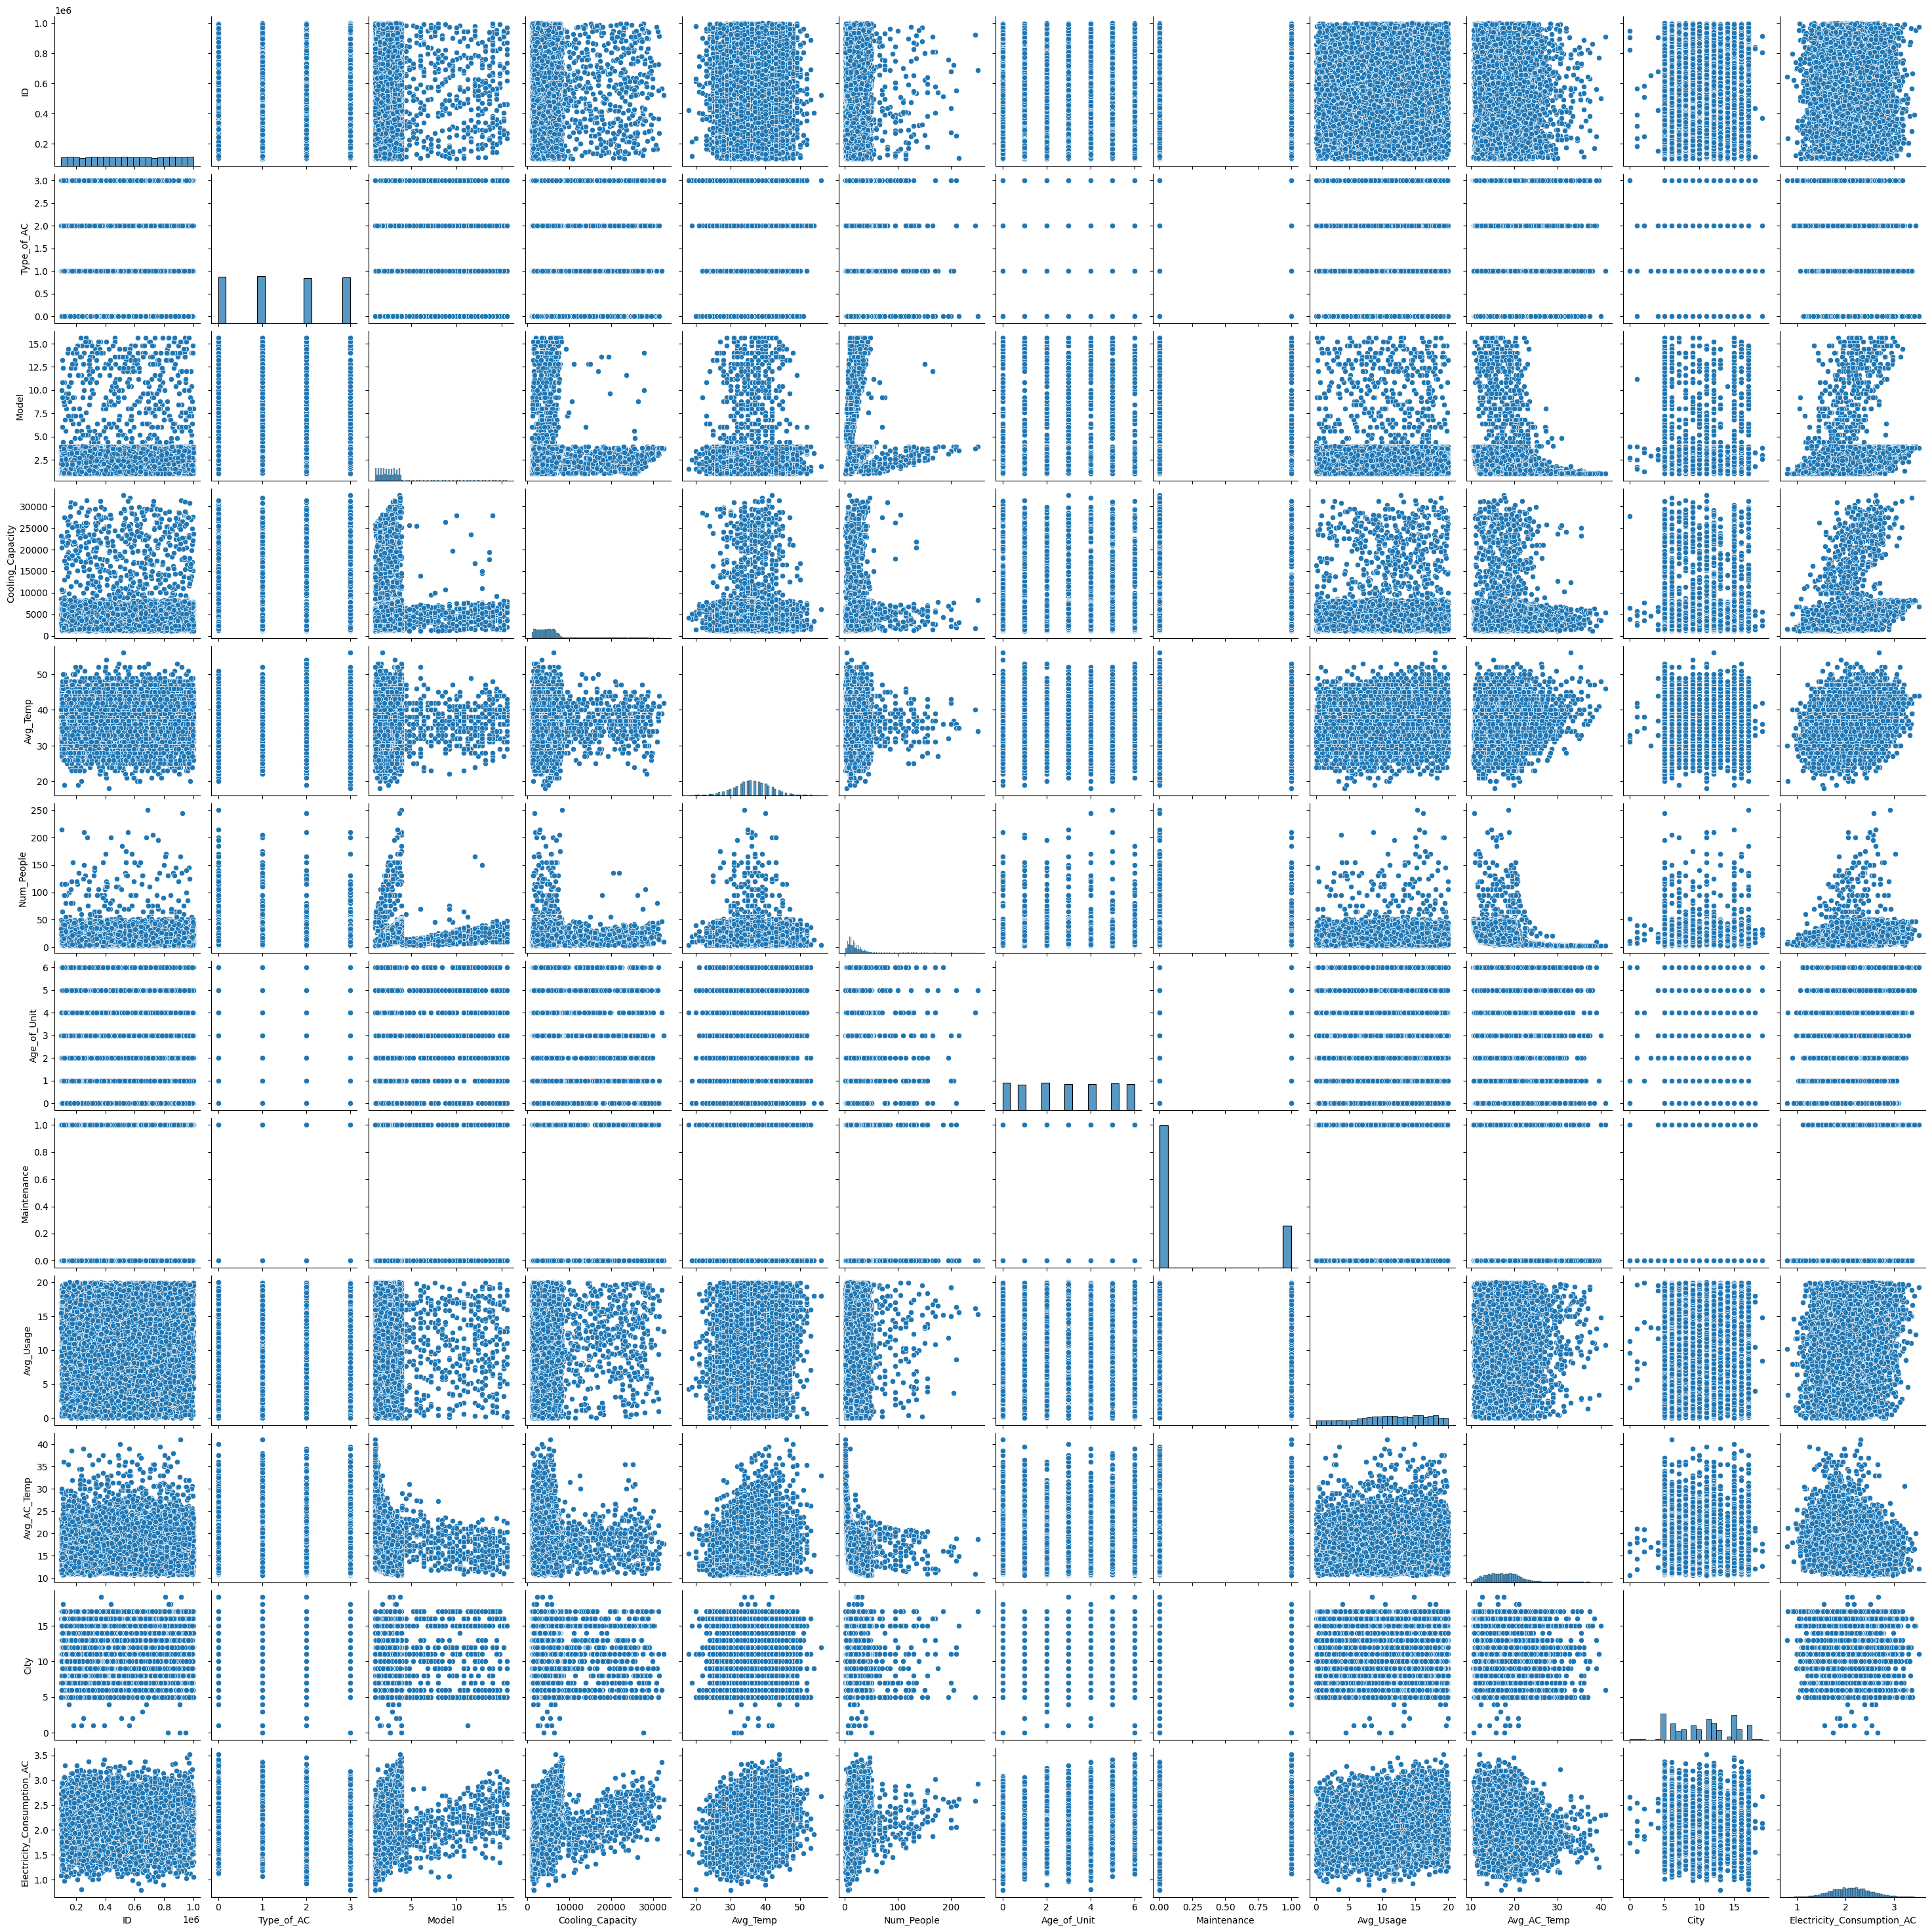

In [6]:
# pairplot with hue day
seaborn.pairplot(df)
# to show
plt.show()

We can conclude that none of the features are correlated to each other

### Train Test Split

In [28]:
X = df.drop(['Electricity_Consumption_AC'],axis=1 )
y = df['Electricity_Consumption_AC']

In [29]:
#Normalisation - so that all the features are in the same range and no feature gets more weight than other features
#scaler = StandardScaler()
#model = scaler.fit(X)
#scaled_df = model.transform(X)

In [30]:
#X_train, X_valid, y_train, y_valid = train_test_split(scaled_df, y, test_size=0.25, random_state=2)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=2)

###ML Models

In [31]:
def eval(actual,predicted):
  score = 100 * (r2_score(actual,predicted))
  return score

In [32]:
###Multiple Linear Regression

regressor1 = LinearRegression()
#train
regressor1.fit(X_train, y_train)

#predict
pred1= regressor1.predict(X_valid)
pred1

array([2.19174739, 2.27517002, 2.02696074, ..., 1.85930075, 1.8901605 ,
       1.80846321])

In [33]:
#Evaluate
score1 = eval( y_valid, pred1)
score1

-2.754770039151798e+17

In [34]:
###Polynomial Regression

x_poly = PolynomialFeatures(3)

x_p= x_poly.fit_transform(X_train)
x_valid_p =x_poly.transform(X_valid)

regressor2 = LinearRegression()
#train
regressor2 .fit(x_p, y_train)

#predict
pred2= regressor2.predict(x_valid_p)

#Evaluate
score2 = eval( y_valid, pred2)
score2

-7.536149774544336e+20

In [35]:
###Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor3 = DecisionTreeRegressor(random_state = 2)

# fit the regressor with X and Y data
regressor3.fit(X_train, y_train)

#predict
pred3= regressor3.predict(X_valid)

#Evaluate
score3 = eval( y_valid, pred3)
score3

32.641862232063104

In [38]:
X = df.drop(['Electricity_Consumption_AC'],axis=1 )
y = df['Electricity_Consumption_AC']

In [42]:
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(regressor3, X, y, scoring='r2', cv=folds)
scores

array([0.39964032, 0.34680655, 0.37399374, 0.33873427, 0.34774287])

###Test File

In [43]:
X_test = pd.read_csv('test.csv')

In [44]:
X_test.dropna(subset = ['Model','Room_SIze', 'Star_Rating', 'Age_of_Unit', 'City', 'Input_Power'], inplace=True)
X_test['Type_of_AC']= label_encoder.fit_transform(X_test['Type_of_AC'])
X_test['City']= label_encoder.fit_transform(X_test['City'])

In [45]:
X_test['Room_SIze'] = pd.to_numeric(X_test['Room_SIze'], errors='coerce')
X_test['Star_Rating'] = pd.to_numeric(X_test['Star_Rating'], errors='coerce')
X_test['Input_Power'] = pd.to_numeric(X_test['Input_Power'], errors='coerce')
X_test =  X_test.fillna(0)

In [47]:
id = X_test['ID']

In [ ]:
#scaled_test = model.transform(X_test)

In [46]:
#test_result = regressor3.predict(scaled_test)

test_result = regressor3.predict(X_test)

In [48]:
sub = pd.DataFrame({'ID' : id, 'Electricity_Consumption_AC': test_result})
sub.head()

,ID,Electricity_Consumption_AC
1,174111,1.291
2,614605,2.095
3,865325,2.027
4,134921,2.324
5,180720,1.724


In [49]:
sub.to_csv('submission_file.csv')